In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('golf-dataset.csv')

In [3]:
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [4]:
X = df.drop('Play Golf', axis = 1)

In [5]:
y = df['Play Golf']

In [6]:
y.shape

(14,)

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
outlook = label.fit_transform(X.Outlook)

In [8]:
Temp = label.fit_transform(X.Temp)
Humidity = label.fit_transform(X.Humidity)
Windy = label.fit_transform(X.Windy)

In [9]:
X['outlook'] = outlook
X['temperature'] = Temp
X['Humidity_le'] = Humidity
X['Windy_le'] = Windy

In [10]:
X

,Outlook,Temp,Humidity,Windy,outlook,temperature,Humidity_le,Windy_le
0,Rainy,Hot,High,False,1,1,0,0
1,Rainy,Hot,High,True,1,1,0,1
2,Overcast,Hot,High,False,0,1,0,0
3,Sunny,Mild,High,False,2,2,0,0
4,Sunny,Cool,Normal,False,2,0,1,0
5,Sunny,Cool,Normal,True,2,0,1,1
6,Overcast,Cool,Normal,True,0,0,1,1
7,Rainy,Mild,High,False,1,2,0,0
8,Rainy,Cool,Normal,False,1,0,1,0
9,Sunny,Mild,Normal,False,2,2,1,0


In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

In [12]:
X.drop(['Outlook', 'Temp', 'Humidity', 'Windy'], axis=1, inplace=True)

In [14]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(74.4, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(148.8, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(74.4, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 108.72, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 65.232, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

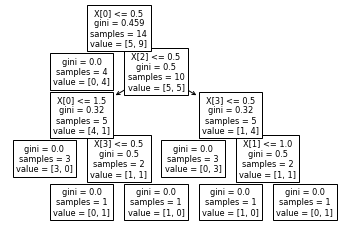

In [15]:
from sklearn.tree import plot_tree
plot_tree(model)

Source ~ https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

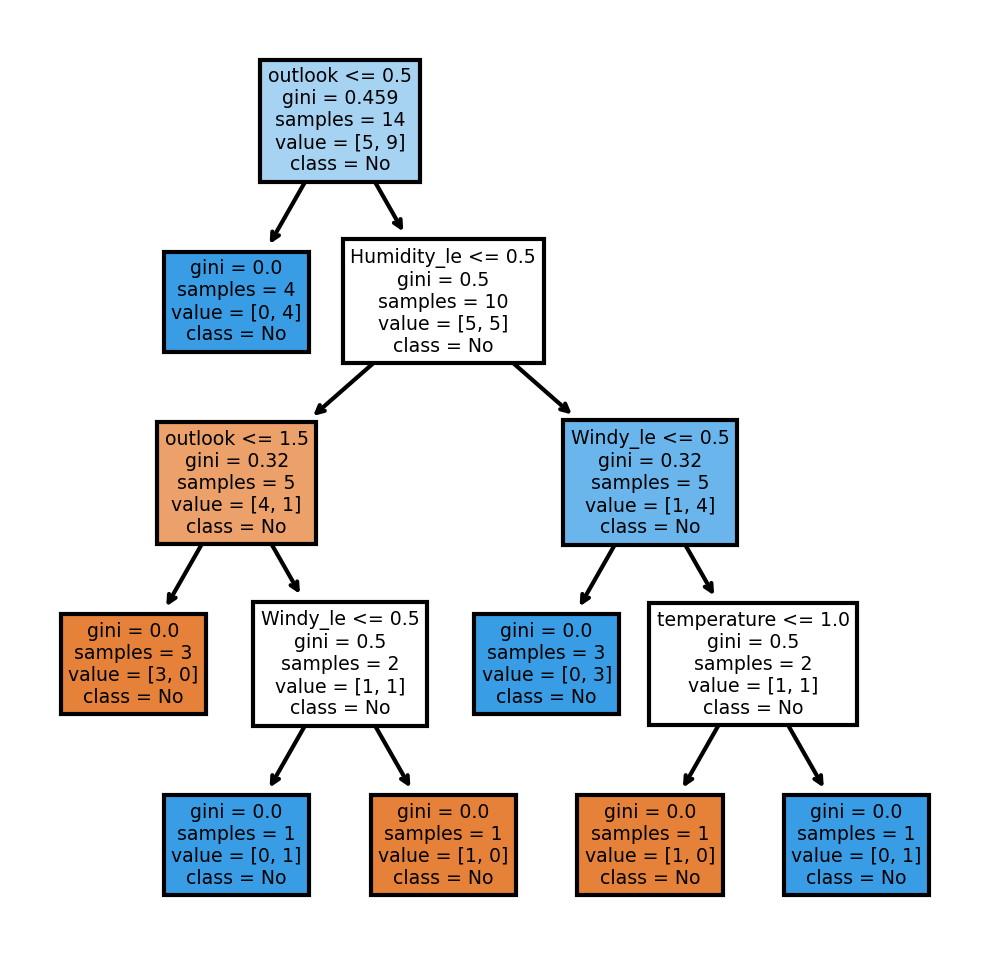

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model, feature_names = X.columns, class_names=y.values, filled = True);
fig.savefig('imagename.png')